# Урок 4

## Непрерывные случайные величины. Функция распределения и плотность распределения вероятностей. Равномерное и нормальное распределение. Центральная предельная теорема

### Непрерывные случайные величины

Ранее мы познакомились с дискретными случайными величинами. Такие величины принимают дискретные, т.е. разделимые значения. Например, это может быть конечное или счётное множество значений.

__Непрерывные случайные величины__ принимают все значения, содержащиеся в заданном промежутке. Промежуток может быть конечным или бесконечным.

Например, рост или вес человека — непрерывные случайные величины: они могут принимать любое значение в пределах от $0$ до бесконечности (потенциально).

Закон распределения вероятностей дискретной случайной величины мы задавали как соответствие между значениями $a_i$ случайной величины и соответствующими вероятностями $P(X = a_i)$. Для непрерывных случайных величин аналогичный подход невозможен, поскольку вероятность $P(X = a)$ для непрерывной случайной величины $X$ равна $0$ для любого $a$.

В связи с этим для непрерывных случайных величин вводят вместо этого __функцию распределения вероятностей__:

$$F(x) = P(X < x).$$

Функция распределения показывает, какова для каждого $x$ вероятность того, что случайная величина $X$ принимает значение меньше $x$. Эта функция монотонно возрастает на отрезке, на котором определена случайная величина. Кроме того, $F(-\infty) = 0$ и $F(\infty) = 1$.

__Пример 1__

Рассмотрим опять данные по хоккеистам и построим по ним _эмпирическую_ (т.е. полученную опытным путём) функцию распределения возраста хоккеистов.

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 12, 8

In [2]:
df = pd.read_csv('hockey_players.csv', encoding='cp1251', parse_dates=['birth'])
df = df.drop_duplicates(['name', 'birth'])
df.head()

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


In [3]:
def edf(samples, x: float) -> float:
    """Эмпирическая функция распределения (empirical distribution
    function).
    """
    
    return samples[samples < x].shape[0] / samples.shape[0]

С помощью `matplotlib` построим график данной функции в пределах от $10$ до $50$.

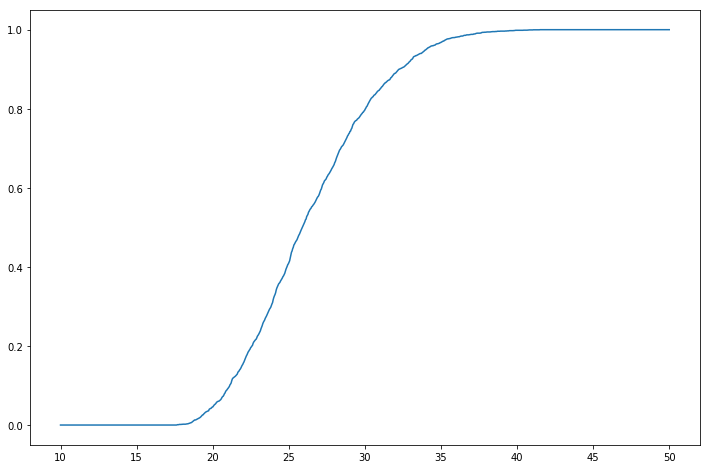

In [8]:
ox = np.linspace(10, 50, 1000)
oy = np.array([edf(df['age'], x) for x in ox])

plt.plot(ox, oy)

Аналогию с законом распределения вероятностей дискретной случайной величины удобно проводить с помощью __плотности распределения вероятностей__. Функция плотности распределения равна производной от функции распределения:

$$f(x) = F'(x).$$

Для непрерывной случайной величины площадь под графиком функции $f(x)$ равна $1$, аналогично тому, что сумма вероятностей значений дискретной случайной величины равна $1$.

Однако, стоит помнить, что значение $f(x)$ не является вероятностью $P(X = x)$. В некоторых случаях отдельные значения $f(x)$ могут быть вовсе больше $1$.

Плотность распределения можно визуализировать с помощью гистограммы, передав в неё значение параметра `density=True`.

__Пример 2__

Построим гистограмму значений возраста хоккеистов, чтобы примерно представить, как выглядит соответствующая функция плотности распределения.

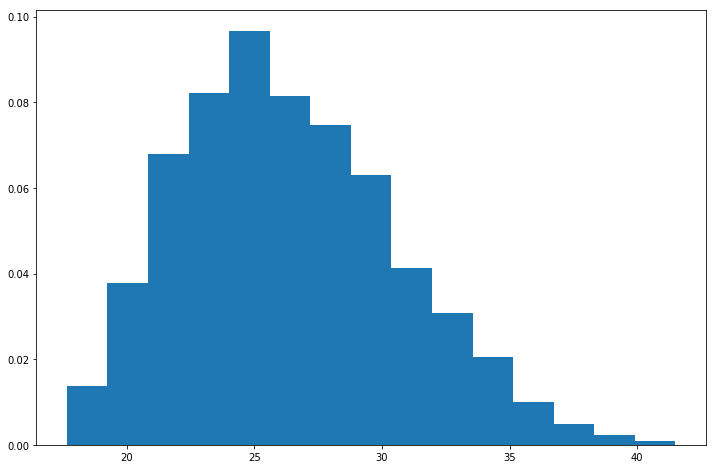

In [9]:
plt.hist(df['age'], density=True, bins=15)
plt.show()

Математическое ожидание и дисперсия для непрерывной случайной величины также считаются иначе, чем для дискретной. 

Формула для математического ожидания:

$$M(X) = \displaystyle\int_{-\infty}^\infty x \cdot f(x) \: dx$$

Формула для дисперсии:

$$D(X) = \displaystyle\int_{-\infty}^\infty (x - M(X))^2 \cdot f(x) \: dx$$

### Примеры непрерывных распределений

Непрерывная случайная величина $X$ имеет __равномерное распределение__ на отрезке $[a, b]$, если её плотность внутри этого отрезка постоянна, а вне этого отрезка равна 0. Её плотность распределения:

$$
f(x) = \begin{cases}
\dfrac{1}{b - a}, & x \in [a, b], \\
0, & x \not\in [a, b].
\end{cases}
$$

Не путать с _дискретным равномерным_ распределением.

__Пример 3__

Выборку из равномерного распределения можно получить с помощью функции `uniform` из модуля `numpy.random`. Построим выборку из равномерного распределения с параметрами $a = -1.5$, $b = 2.5$.

In [10]:
a = -1.5
b = 2.5

In [20]:
samples = np.random.uniform(a, b, size=10000)

print(samples)

[-1.42634902  1.97903937 -1.07445784 ...  1.37282428 -0.73727665
  2.19243638]


Построим эмпирическую функцию распределения.

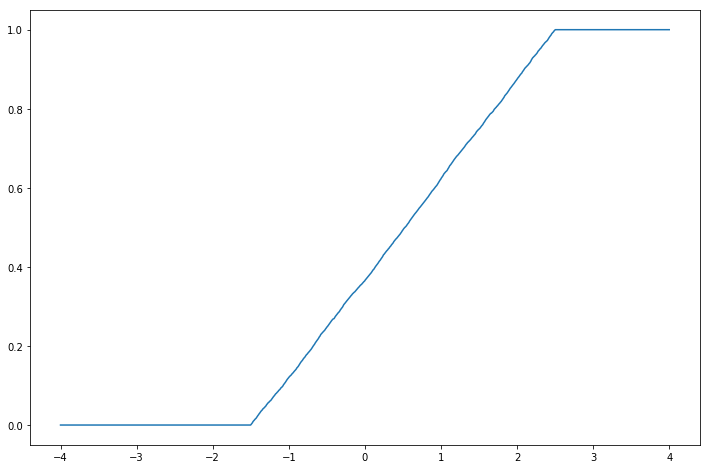

In [21]:
ox = np.linspace(-4, 4, 1000)
oy = np.array([edf(samples=samples, x=x) for x in ox])

plt.plot(ox, oy)

Построим гистограмму, чтобы визуализировать функцию плотности. Вместе с ней построим теоретическую функцию плотности.

In [22]:
def pdf_uniform(a: float, b: float, x: float) -> float:
    """Функция плотности (probability density 
    function) равномерного распределения.
    """
    
    return 1 / (b - a) if a <= x <= b else 0

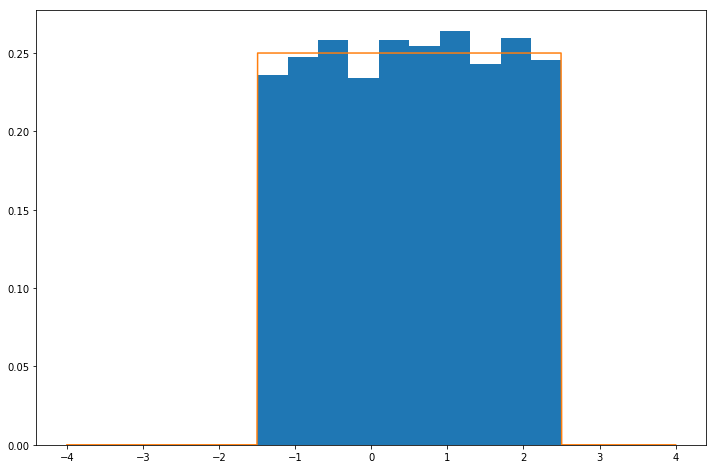

In [23]:
oy = np.array([pdf_uniform(a, b, x) for x in ox])

plt.hist(samples, density=True)
plt.plot(ox, oy)

Математическое ожидание и дисперсия равномерного распределения:

$$M(X) = \dfrac{a + b}{2}, \text{ } D(X) = \dfrac{(b - a)^2}{12}.$$

__Пример 4__

Математическое ожидание распределения из предыдущего примера равно

$$M(X) = \dfrac{a + b}{2} = \dfrac{-1.5 + 2.5}{2} = \dfrac{1}{2}.$$

Посчитаем выборочное среднее от выборки:

In [24]:
samples.mean()

0.5124281978703791

Дисперсия этого распредлеения равна

$$D(X) = \dfrac{(b - a)^2}{12} = \dfrac{4^2}{12} = \dfrac{4}{3} \approx 1.333.$$

Выборочная дисперсия (несмещённая) от выборки:

In [26]:
samples.var(ddof=1)

1.3202418566857361

Непрерывная случайная величина $X$ имеет __нормальное распределение__ с параметрами $a$ и $\sigma > 0$, если её плотность распределения задаётся формулой

$$f(x) = \dfrac{1}{\sigma \sqrt{2 \pi}} \: e^{- \frac{(x - a)^2}{2 \sigma^2}}.$$

Нормальное распределение с параметрами $a = 0$ и $\sigma = 1$ называется __стандартным нормальным распределением__.

Нормальное распределение является одним из наиболее распространённых на практике. Например, нормально распределены:

* рост, вес людей
* показатели IQ
* время прихода на работу
* скорость движения молекул в жидкостях и газах

Как правило, нормально распределёнными являются случайные величины, описывающие события, которые зависят от большого числа слабо связанных случайных факторов.

__Пример 5__

Выборку из нормального распределения можно получить с помощью функции `normal` из модуля `numpy.random`. Построим такую выборку с параметрами $a = 3$, $\sigma = 2$.

In [31]:
loc = 3
scale = 2

In [32]:
samples = np.random.normal(loc, scale, size=10000)

print(samples)

[ 1.12624092  5.88304784  4.28328741 ... -0.43321414  2.33125297
  1.09358404]


Эмпирическая функция распределения:

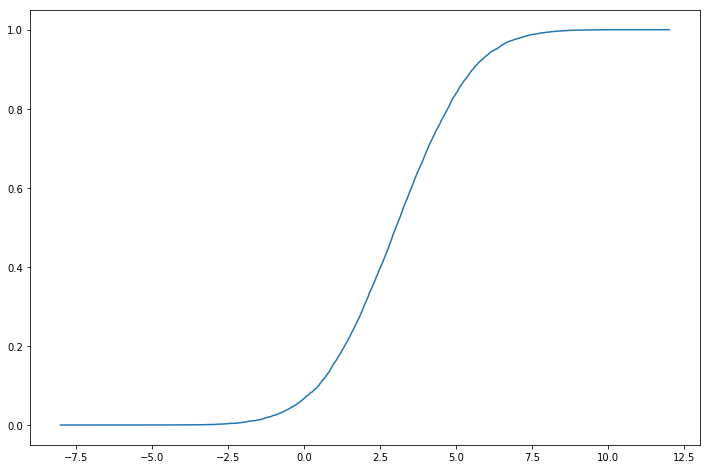

In [33]:
ox = np.linspace(-8, 12, 1000)
oy = np.array([edf(samples, x) for x in ox])

plt.plot(ox, oy)

Гистограмма выборки и теоретическая функция плотности:

In [34]:
def pdf_normal(loc: float, scale: float, x: float) -> float:
    """Функция плотности нормального распределения.
    """
    
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

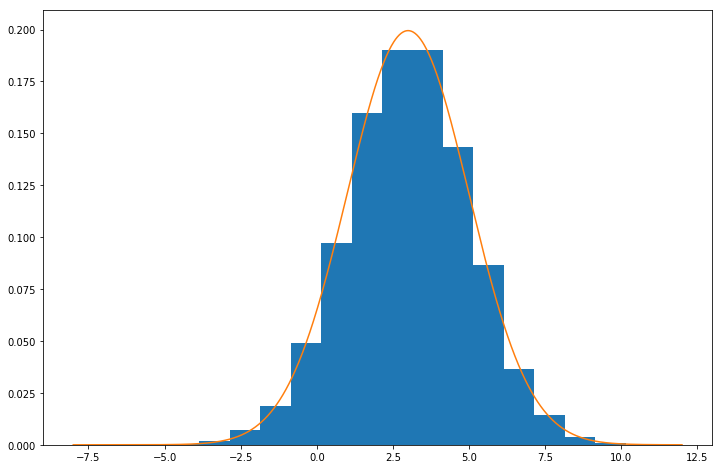

In [35]:
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=15)
plt.plot(ox, oy)

Кстати, в модуле `scipy.stats` есть готовые функции распределения и плотности для многих известных распределений (об этом ниже).

Математическое ожидание и дисперсия нормального распределения:

$$M(X) = a, \: D(X) = \sigma^2.$$

__Пример 6__

Математическое ожидание распределения из предыдущего примера равно 3. Посчитаем выборочное среднее:

In [ ]:
samples.mean()

Дисперсия равна 4. Выборочная дисперсия:

In [ ]:
samples.var()

Для вычисления разброса значений нормально распределённой случайной величины можно использовать следующие правила:

* _Интерквартильный размах такой_ величины содержит $50\%$ её вероятностной массы (т.е. с вероятностью $50\%$ данная величина попадает в этот интервал).
* Интервал от $a - \sigma$ до $a + \sigma$ содержит около $68\%$ вероятностной массы.
* От $a - 2\sigma$ до $a + 2\sigma$ — около $95\%$ массы (__правило двух сигм__).
* От $a - 3\sigma$ до $a + 3\sigma$ — около $99.7\%$ массы (__правило трёх сигм__).

In [44]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.6826894921370859

In [45]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

0.9544997361036416

In [46]:
stats.norm.cdf(3) - stats.norm.cdf(-3)

0.9973002039367398

__Пример 7__

Вернёмся к данным о хоккеистах и рассмотрим столбец с ростом. Построим его гистограмму.

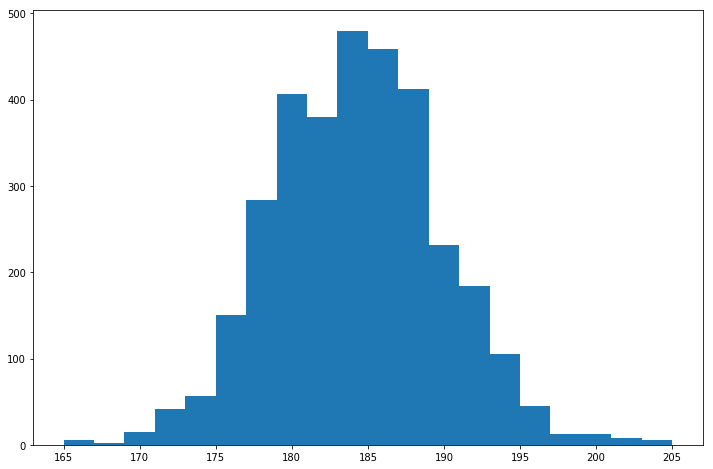

In [47]:
plt.hist(df['height'], bins=20)
plt.show()

Мы знаем, что рост — одна из величин, которая может распределяться нормально. Восстановим по выборке значения $a$ и $\sigma$ и построим поверх гистограммы теоретическую функцию плотности соответствующего нормального распределения.

In [50]:
loc = df['height'].mean()
scale = df['height'].std()

loc, scale

(183.829386763813, 5.467628706191652)

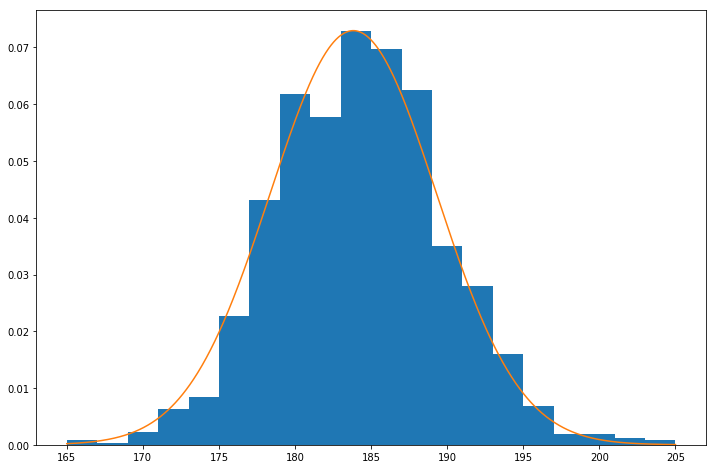

In [51]:
ox = np.linspace(165, 205, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(df['height'], density=True, bins=20)
plt.plot(ox, oy)

Проверим на этих данных правило двух сигм. В отрезке `(loc - 2 * scale, loc + 2 * scale)` должно содержаться $95\%$ значений.

In [52]:
two_sigmas_condition = (df['height'] > loc - 2 * scale) & (df['height'] < loc + 2 * scale)

df[two_sigmas_condition].shape[0] / df.shape[0]

0.9556769884638737

__Другие непрерывные распределения__

* __Экспоненциальное__ (или __показательное__): время между последовательными свершениями одного и того же события. Функция распределения:

$$
F(x) = \begin{cases}
1 - e^{- \lambda x}, & x \geq 0, \\
0, & x < 0.
\end{cases}
$$

### `scipy.stats`

В модуле `scipy.stats` содержатся реализации основных функций для различных распределений:

* `binom` — биномиальное,
* `poisson` — Пуассоновское,
* `norm` — нормальное,
* `uniform` — непрерывное равномерное,
* `t` — распределение Стьюдента (о нём позже)

и др. Доступные функции:

* `pmf` — закон распределения для дискретных величин,
* `pdf` — функция плотности для непрерывных величин,
* `cdf` — функция распределения,
* `ppf` — квантильная функция (обратная к функции распределения)

и др. Например, с помощью этого модуля можно получить значения функции нормального распределения, которая не вычисляется аналитично и доступна лишь численно.

In [ ]:
from scipy import stats

In [ ]:
norm = stats.norm(loc=8, scale=2)
cdf = norm.cdf

In [ ]:
ox = np.linspace(0, 16, 1000)
oy = np.array([cdf(x) for x in ox])

plt.plot(ox, oy)

А с помощью функции `ppf` получим значение третьего квартиля:

In [ ]:
norm.ppf(0.75)

### Центральная предельная теорема

Ранее мы отмечали, что, как правило, случайные величины, описывающие события, которые зависят от большого числа слабо связанных случайных факторов, являются нормально распределёнными.
Это правило хорошо иллюстрирует центральная предельная теорема.

Рассмотрим выборку из $n$ значений случайной величины $X$ и пусть $Y$ — сумма этих значений. Как мы знаем, $Y$ также является случайной величиной. Какое распределение имеет эта величина?

__Центральная предельная теорема__ утверждает: чем больше $n$, тем ближе распределение величины $Y$ к нормальному распределению с параметрами

$$a = n \cdot M(X), \: \sigma^2 = n \cdot D(X).$$

Аналогично, если в качестве $Y$ брать не сумму, а среднее значений выборки, то с увеличением $n$ распределение этого значения будет всё ближе к нормальному распределению с параметрами

$$a = M(X), \: \sigma^2 = \dfrac{D(X)}{n}.$$

Отметим, что центральная предельная теорема работает не только для непрерывных случайных величин, но и для дискретных.

__Пример 8__

Проверим утверждение центральной предельной теоремы на равномерном распределении $X$ с параметрами $a = -1.5$,
$b = 2.5$. Для этого при различных $n$ сформируем $n$ выборок размера, например, $10^4$, а затем посчитаем от них поэлементно среднее. Таким образом, мы получим одну выборку размера $10^4$. Теорема утверждает, что чем больше $n$, тем больше эта выборка похожа на выборку из некоторого нормального распределения $Y$.

Математическое ожидание величины $X$ равно $\dfrac{a + b}{2} = \dfrac{1}{2}$. Дисперсия: 
$\dfrac{(b - a)^2}{12} = \dfrac{4^2}{12} = \dfrac{4}{3}$. Это означает, что нормальное распределение $Y$ имеет параметры $a = \dfrac{1}{2}$, $\sigma^2 = \dfrac{4}{3n}$.

In [53]:
a = -1.5
b = 2.5

m = (a + b) / 2
d = ((b - a) ** 2) / 12

n_samples = 10 ** 4

In [54]:
def get_mean_samples_uniform(n):
    samples = np.random.uniform(a, b, size=(n, n_samples))
    
    return samples.mean(axis=0)

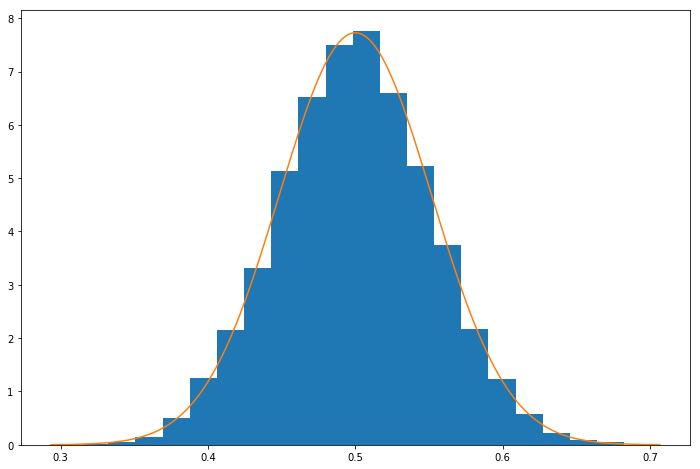

In [55]:
n = 500

loc = m
scale = np.sqrt(d / n)

samples = get_mean_samples_uniform(n)

ox = np.linspace(loc - 4 * scale, loc + 4 * scale, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy)

__Пример 9__

Аналогично продемонстрируем центральную предельную теорему на примере дискретного распределения, а именно биномиального с параметрами $n = 30$, $p = 0.2$. Параметр $n$ обозначим переменной `n_`, чтобы не конфликтовать с переменной `n`, отвечающей за число случайных величин, от которых берётся среднее.

Математическое ожидание в данном случае равно $np = 6$, дисперсия: $np(1 - p) = 4.8$.

In [56]:
30 * 0.2 * 0.8

4.800000000000001

In [57]:
n_ = 30
p = 0.2

m = n_ * p
d = n_ * p * (1 - p)

n_samples = 10 ** 4

In [58]:
def get_mean_samples_binomial(n):
    samples = np.random.binomial(n_, p, size=(n, n_samples))
    
    return samples.mean(axis=0)

In [65]:
get_mean_samples_binomial(500)

array([6.034, 5.888, 6.236, ..., 5.896, 5.946, 6.06 ])

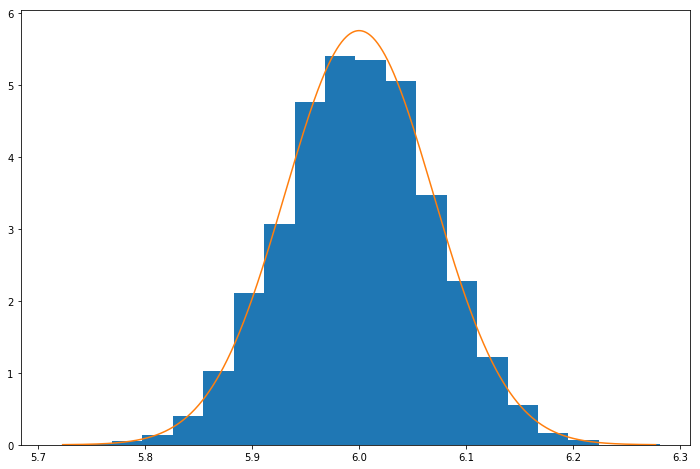

In [88]:
n = 1000

loc = m
scale = np.sqrt(d / n)

samples = get_mean_samples_binomial(n)

ox = np.linspace(loc - 4 * scale, loc + 4 * scale, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy)

### Упражнения

__Задача 1__

О непрерывной равномерно распределенной случайной величине `B` известно, что ее дисперсия равна 0.2. Можно ли найти правую границу величины `B` и ее среднее значение зная, что левая граница равна 0.5? Если да, найдите ее.

__Задача 2__

На сколько сигм (средних квадратических отклонений) отклоняется рост человека, равный 190 см, от математического ожидания роста в популяции, в которой `M(X) = 178` и `D(X) = 25`?

__Задача 3__

Рост взрослого населения города `X` имеет нормальное распределение, причем, средний рост равен 174 см, а среднее квадратическое отклонение равно 8 см. Без использования сторонних библиотек (`numpy`, `scipy`, `pandas` и пр.) посчитайте, какова вероятность того, что случайным образом выбранный взрослый человек имеет рост:
1. больше 182 см?
2. больше 190 см?
3. от 166 см до 190 см?
4. от 166 см до 182 см?
5. от 158 см до 190 см?
6. не выше 150 см или не ниже 190 см?
7. не выше 150 см или не ниже 198 см?
8. ниже 166 см?

_Подсказка_: всё необходимое для решения этого задания было в уроке 4.

__Задача 4__ (на подумать)

Каким образом связаны между собой понятие квантиля и правила двух и трёх сигм? 

Данное задание - на подумать, оформлять его не обязательно. Этот вопрос мы обсудим в начале следующего занятия.